In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

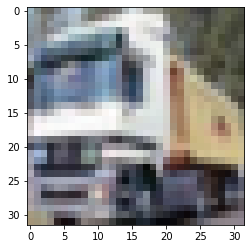

In [ ]:
plt.imshow(x_train[1])

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize = (15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

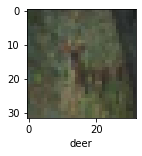

In [ ]:
plot_sample(x_train,y_train,10)

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation = 'relu'),
    layers.Dense(1000,activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
    
])
ann.compile(optimizer = 'SGD',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy']
            )
ann.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 125s 80ms/step - loss: 1.8142 - accuracy: 0.3549
Epoch 2/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.6250 - accuracy: 0.4255
Epoch 3/5
1563/1563 [==============================] - 117s 75ms/step - loss: 1.5443 - accuracy: 0.4563
Epoch 4/5
1563/1563 [==============================] - 114s 73ms/step - loss: 1.4822 - accuracy: 0.4798
Epoch 5/5
1563/1563 [==============================] - 113s 72ms/step - loss: 1.4318 - accuracy: 0.4957


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

In [ ]:
print("Classification report \n",classification_report(y_test,y_pred_classes))

Classification report 
               precision    recall  f1-score   support

           0       0.50      0.59      0.54      1000
           1       0.49      0.75      0.59      1000
           2       0.26      0.65      0.37      1000
           3       0.33      0.42      0.37      1000
           4       0.51      0.23      0.32      1000
           5       0.58      0.18      0.27      1000
           6       0.52      0.51      0.51      1000
           7       0.67      0.43      0.52      1000
           8       0.76      0.42      0.54      1000
           9       0.66      0.39      0.49      1000

    accuracy                           0.46     10000
   macro avg       0.53      0.46      0.45     10000
weighted avg       0.53      0.46      0.45     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4592 - accuracy: 0.4801
Epoch 2/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1019 - accuracy: 0.6157
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9718 - accuracy: 0.6592
Epoch 4/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.8851 - accuracy: 0.6901
Epoch 5/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.8184 - accuracy: 0.7136
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7552 - accuracy: 0.7383
Epoch 7/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.7097 - accuracy: 0.7520
Epoch 8/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6639 - accuracy: 0.7687
Epoch 9/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.6195 - accuracy: 0.7836
Epoch 10/10
1563/1563 [==============================] - 63s 40m